In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
# https://pypi.org/project/yfinance/

In [ ]:
# https://seekingalpha.com/article/254341-diversification-10-investments-that-dont-correlate-with-the-s-and-p

In [ ]:
# stock_dict = {}
# stock_dict['VEQT.TO'] = {"name": }

In [ ]:
#https://seekingalpha.com/article/254341-diversification-10-investments-that-dont-correlate-with-the-s-and-p

In [187]:
stock_list = ['VEQT.TO', 'ARKK','ICLN','SLV', 'AIA', 'VUG','IAU','IEIH','TIP','LQD','EMB','VNO','IYR']

In [188]:
portfolio = yf.download(stock_list,
                      period = '5y',
                      progress=False,
                     interval = "1d")
portfolio.head()

Adj Close                                                         \
                  AIA       ARKK        EMB    IAU      ICLN IEIH        IYR   
Date                                                                           
2016-05-02  38.983624  17.821548  88.402222  12.45  8.119722  NaN  65.549217   
2016-05-03  38.032150  17.558914  88.203484  12.42  7.922775  NaN  65.405563   
2016-05-04  37.669674  17.080547  87.996796  12.36  7.895916  NaN  66.284294   
2016-05-05  37.787476  17.033648  88.203484  12.34  7.788488  NaN  66.537758   
2016-05-06  37.651550  16.827293  88.314774  12.44  7.878014  NaN  67.188339   

                                               ...      Volume                \
                   LQD        SLV         TIP  ...         IAU     ICLN IEIH   
Date                                           ...                             
2016-05-02  102.469543  16.639999  104.233719  ...   8232700.0  21900.0  NaN   
2016-05-03  102.649094  16.570000  104.279243  ...   6448200.0  35100.0  NaN   
2016-05-04  102.478096  16.490000  104.397560  ...   6288100.0  45000.0  NaN   
2016-05-05  102.683289  16.510000  104.734428  ...  11181600.0  24700.0  NaN   
2016-05-06  102.460983  16.629999  104.370255  ...   8346800.0  23200.0  NaN   

                                                                             \
                   IYR        LQD         SLV        TIP VEQT.TO        VNO   
Date                                                                          
2016-05-02  10588200.0  6771200.0  12874000.0  4130100.0     NaN   898928.0   
2016-05-03   5919500.0  3732700.0   9740600.0  2645800.0     NaN  1694566.0   
2016-05-04  10523700.0  4228200.0   8323400.0  1321300.0     NaN  1307633.0   
2016-05-05   6963000.0  4466000.0   7639700.0  2363900.0     NaN  1285119.0   
2016-05-06   9213600.0  3045000.0   9188200.0  1271900.0     NaN  1696546.0   

                       
                  VUG  
Date                   
2016-05-02   585500.0  
2016-05-03   727900.0  
2016-05-04   594500.0  
2016-05-05   465800.0  
2016-05-06  1557300.0  

[5 rows x 78 columns]

In [157]:
def plot_stock(portfolio, ticker):
    stock = portfolio.loc[~(portfolio[('Adj Close',    ticker)].isna()),('Adj Close', ticker)]
    # Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
    

    # Calculate the 20 and 100 days moving averages of the closing prices
    short_rolling_stock = stock.rolling(window=20).mean()
    long_rolling_stock = stock.rolling(window=100).mean()
    # Plot everything by leveraging the very powerful matplotlib package
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(stock.index, stock, label=ticker)
    ax.plot(short_rolling_stock.index, short_rolling_stock, label='20 days rolling')
    ax.plot(long_rolling_stock.index, long_rolling_stock, label='100 days rolling')

    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted closing price ($)')
    ax.legend()

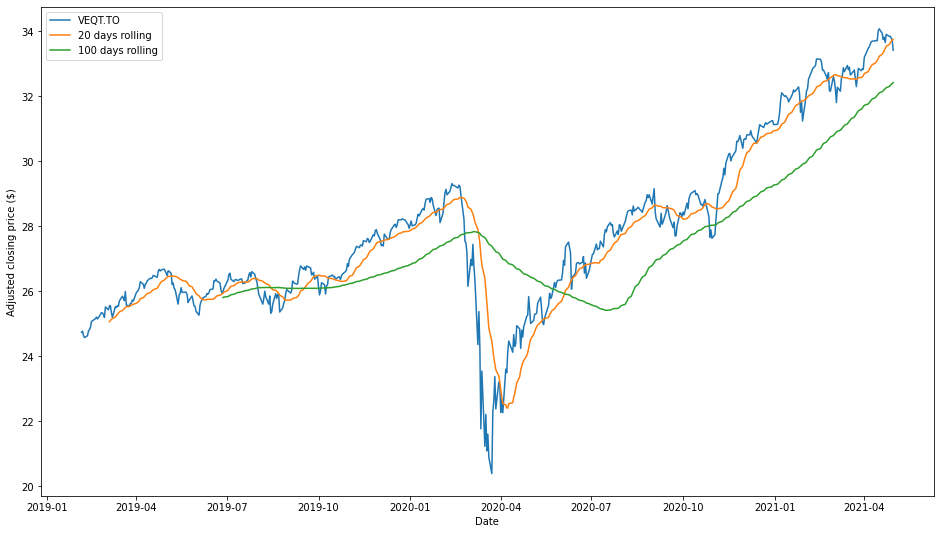

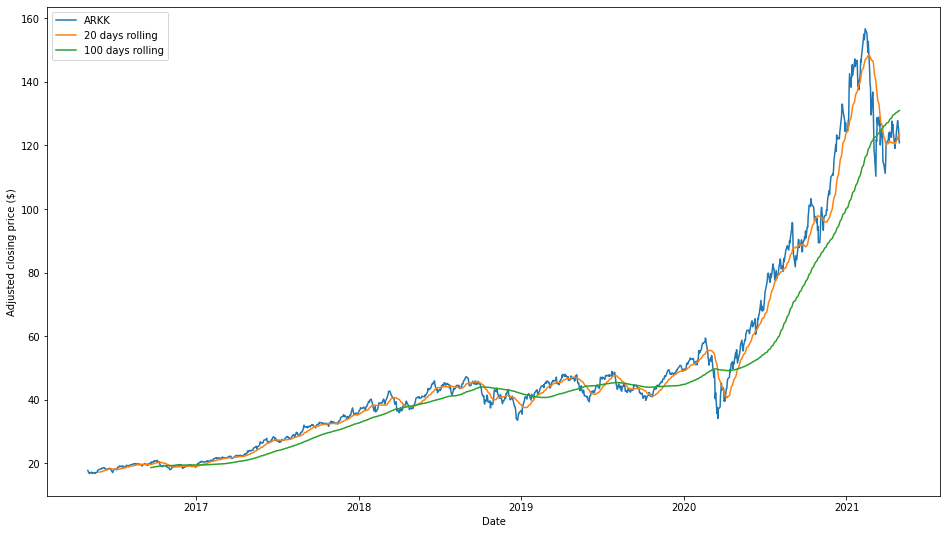

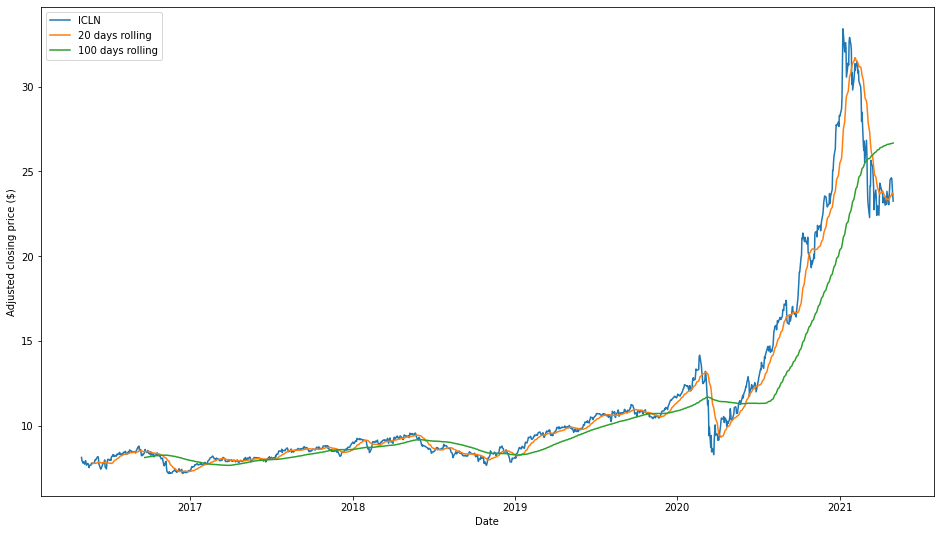

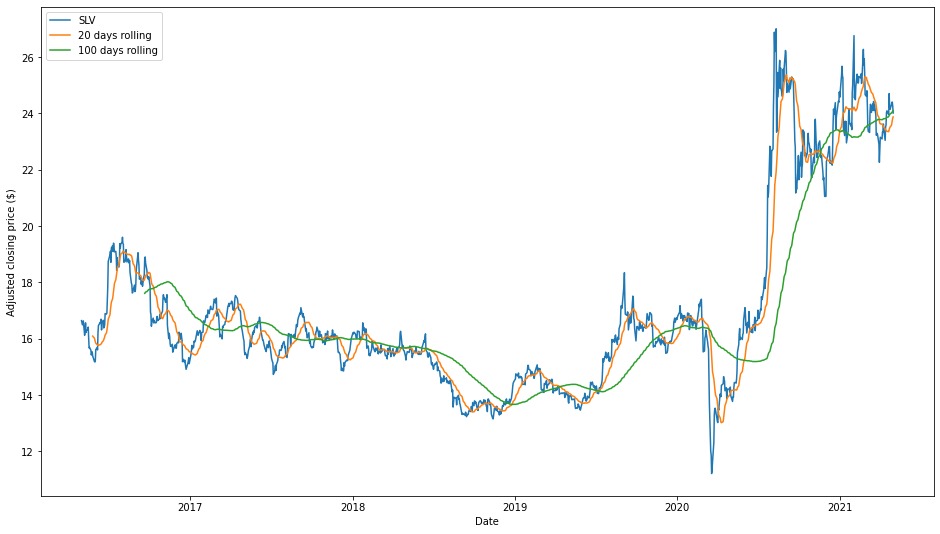

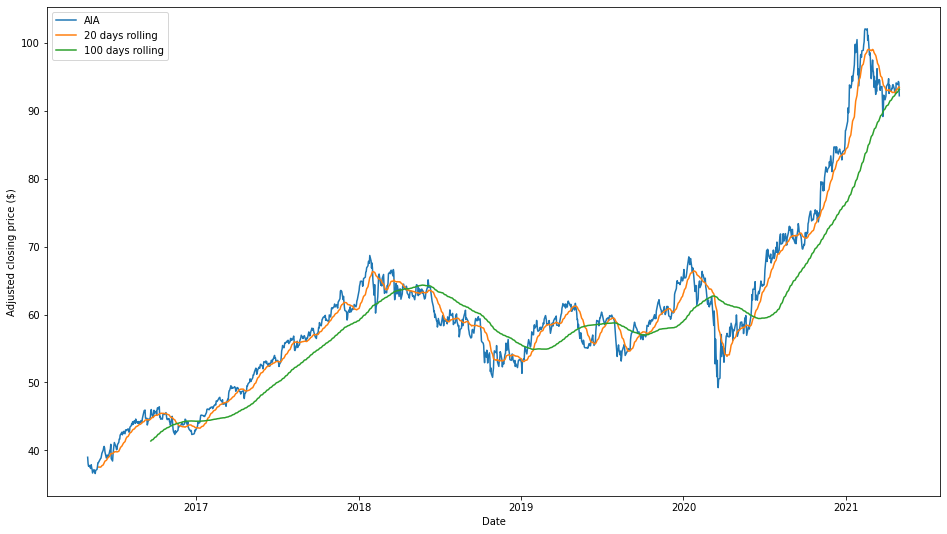

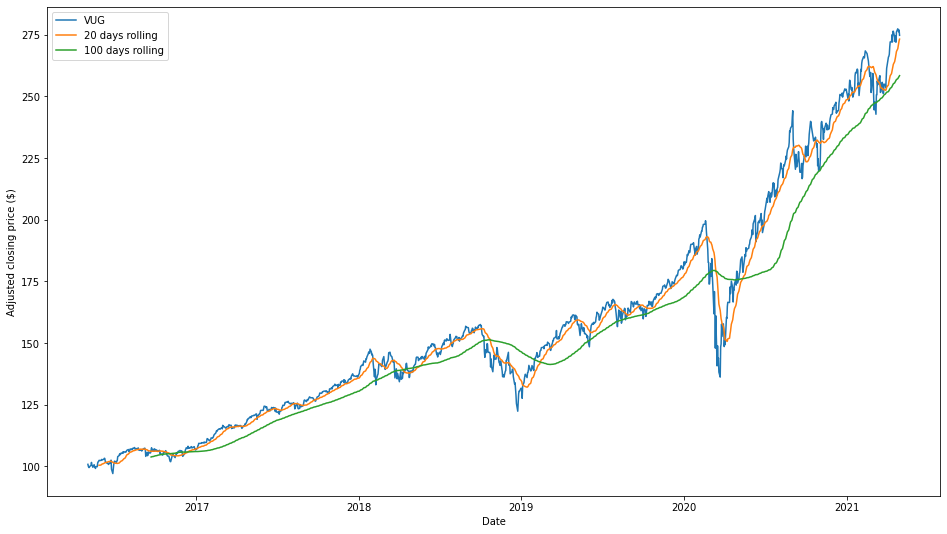

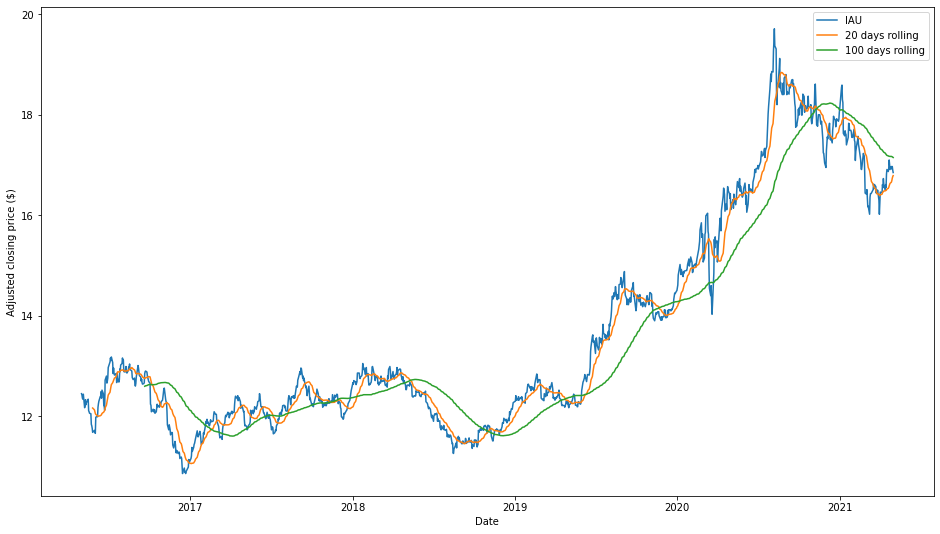

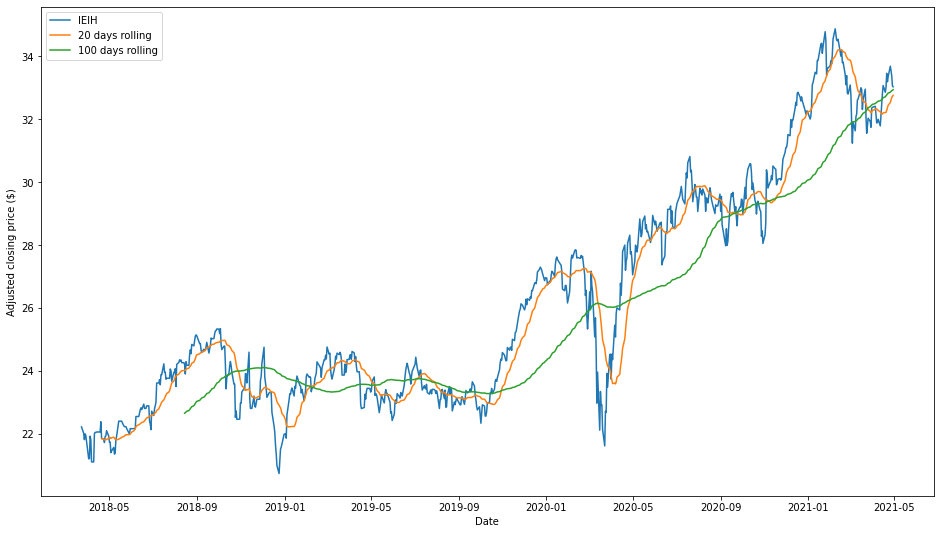

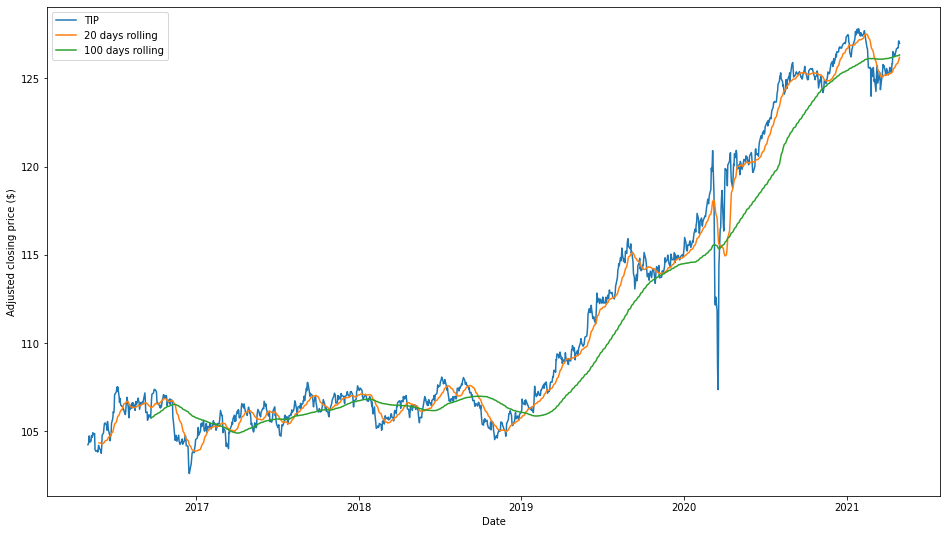

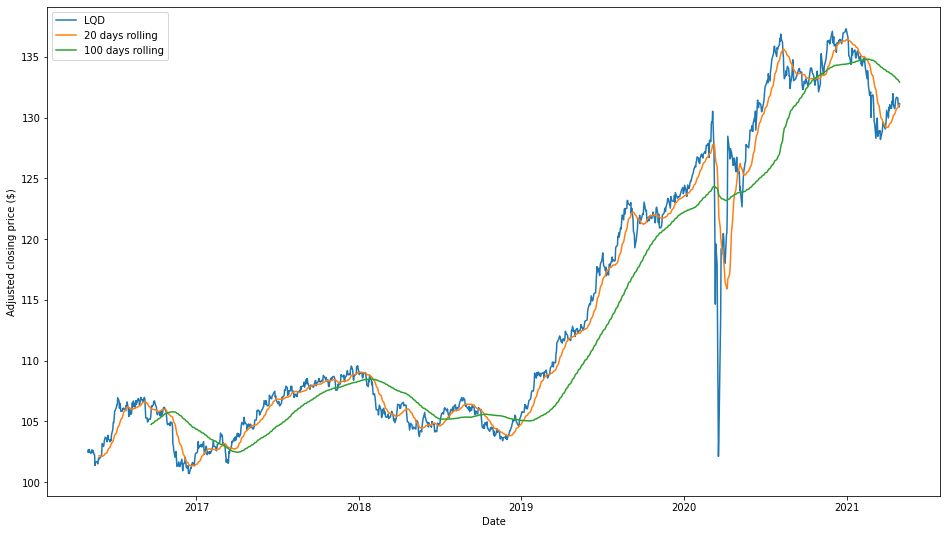

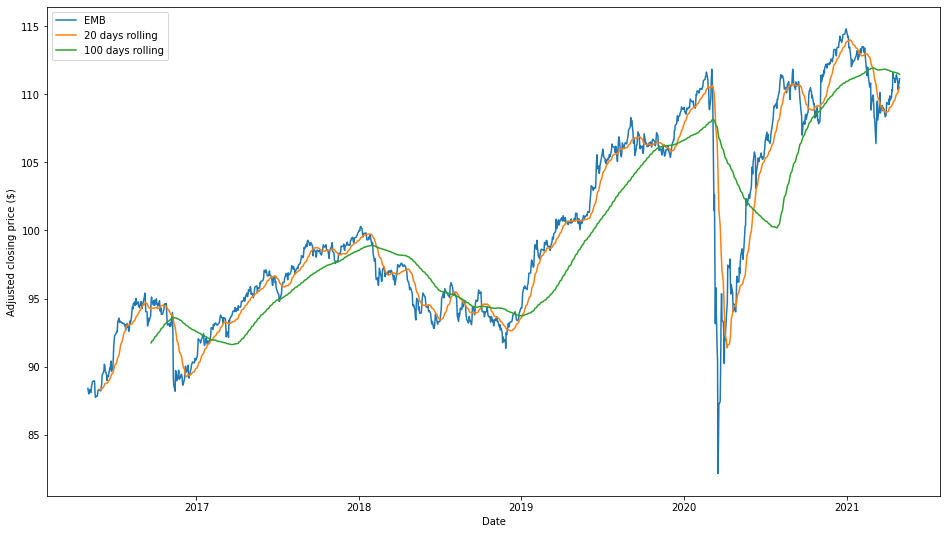

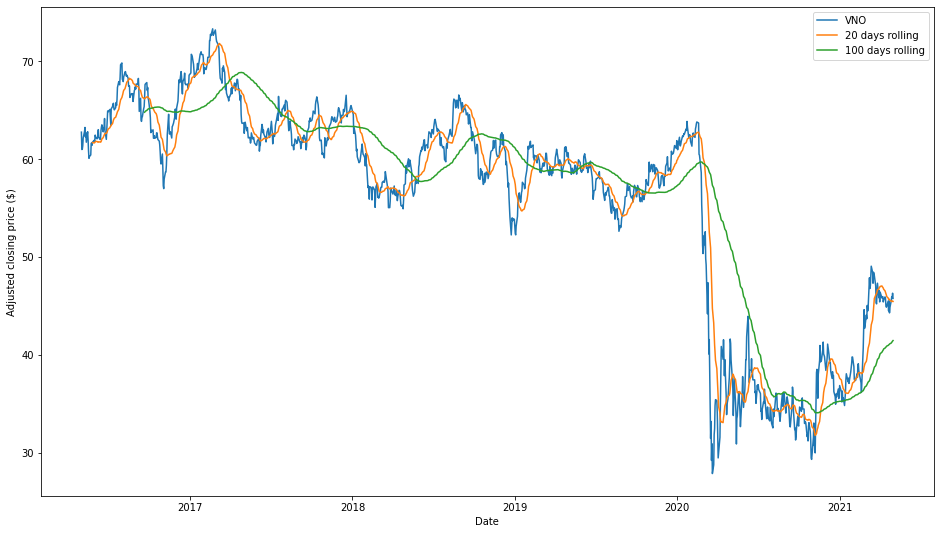

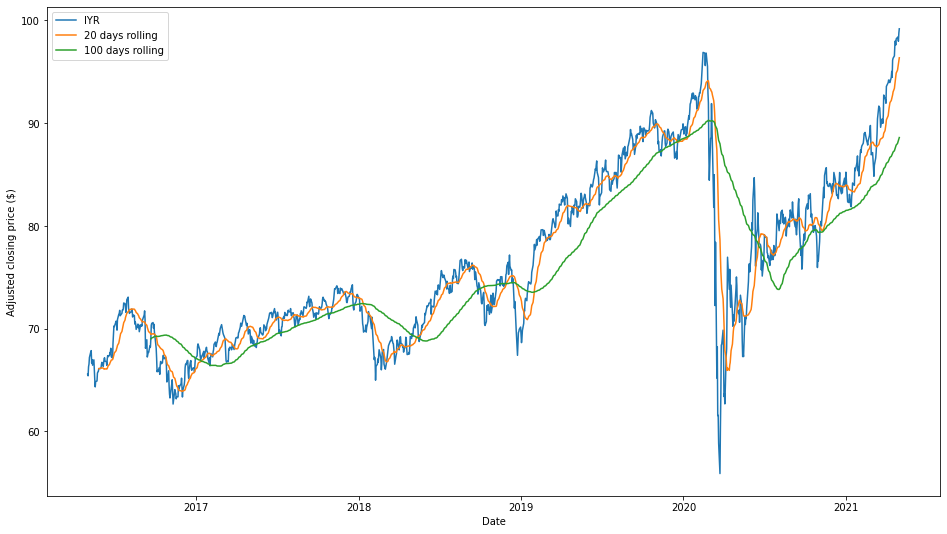

In [189]:
for ticker in stock_list:
    plot_stock(portfolio, ticker)
# plot_stock(portfolio, 'VEQT.TO')

In [144]:
# https://smartasset.com/investing/stock-correlation

In [190]:
corr_table = portfolio.loc[:,('Adj Close')].corr()

In [191]:
corr_table

,AIA,ARKK,EMB,IAU,ICLN,IEIH,IYR,LQD,SLV,TIP,VEQT.TO,VNO,VUG
AIA,1.000000,0.940573,0.797068,0.716037,0.890485,0.880551,0.638894,0.752753,0.668818,0.788491,0.940296,-0.648154,0.920098
ARKK,0.940573,1.000000,0.801504,0.826331,0.965931,0.938840,0.638386,0.841354,0.761525,0.894328,0.885700,-0.767502,0.965704
EMB,0.797068,0.801504,1.000000,0.817149,0.782738,0.732715,0.853222,0.914318,0.649374,0.861842,0.809969,-0.621912,0.876683
IAU,0.716037,0.826331,0.817149,1.000000,0.807177,0.831996,0.566866,0.956429,0.768218,0.967991,0.548267,-0.899041,0.874360
ICLN,0.890485,0.965931,0.782738,0.807177,1.000000,0.900875,0.601240,0.810730,0.831009,0.866746,0.881458,-0.701444,0.902753
IEIH,0.880551,0.938840,0.732715,0.831996,0.900875,1.000000,0.447330,0.843395,0.847487,0.900894,0.852603,-0.693356,0.960911
IYR,0.638894,0.638386,0.853222,0.566866,0.601240,0.447330,1.000000,0.738299,0.393785,0.677622,0.596493,-0.345083,0.746145
LQD,0.752753,0.841354,0.914318,0.956429,0.810730,0.843395,0.738299,1.000000,0.680456,0.979025,0.679383,-0.830017,0.915243
SLV,0.668818,0.761525,0.649374,0.768218,0.831009,0.847487,0.393785,0.680456,1.000000,0.741536,0.834804,-0.564847,0.700693
TIP,0.788491,0.894328,0.861842,0.967991,0.866746,0.900894,0.677622,0.979025,0.741536,1.000000,0.719243,-0.867629,0.939135


In [ ]:
pd.set_option()

In [186]:
pd.DataFrame(corr_table.unstack()).drop_duplicates().sort_values(by=0)

0
IAU  VNO  -0.899136
TIP  VNO  -0.868681
LQD  VNO  -0.829506
VNO  VUG  -0.794941
ARKK VNO  -0.769152
...             ...
     ICLN  0.964877
     VUG   0.964912
IAU  TIP   0.968115
LQD  TIP   0.979468
AIA  AIA   1.000000

[79 rows x 1 columns]

In [92]:
global_index = pd.read_csv("Global Index.csv")

In [75]:
from datetime import datetime

In [65]:
index_data = pd.read_csv('Index_data.csv', header=[0,1])

In [89]:
global_index.columns[0]

('Global Index Key - Index Monthly', '150001')

In [93]:
global_index.head()

,Global Index Key - Index Monthly,Index Price - Close Monthly,Index Price - High Monthly,Index Price - Low Monthly,Data Date - Index Monthly,Index Name,Index Code Type,Ticker,Index Identifier,Index Category Code,Major Index Description
0,150001,376.74,377.42,360.35,31-1-2007,Affarsvarlden General Index,COMPOSITE,I3SWE001,SWE,EXCHG,Affarsvarlden General Index
1,150001,368.12,390.46,368.12,28-2-2007,Affarsvarlden General Index,COMPOSITE,I3SWE001,SWE,EXCHG,Affarsvarlden General Index
2,150001,387.20,387.72,361.91,31-3-2007,Affarsvarlden General Index,COMPOSITE,I3SWE001,SWE,EXCHG,Affarsvarlden General Index
3,150001,405.14,407.94,390.58,30-4-2007,Affarsvarlden General Index,COMPOSITE,I3SWE001,SWE,EXCHG,Affarsvarlden General Index
4,150001,410.33,410.33,392.74,31-5-2007,Affarsvarlden General Index,COMPOSITE,I3SWE001,SWE,EXCHG,Affarsvarlden General Index


In [97]:
index_data.head()

,Unnamed: 0_level_0,Nikkei 225 Index,Hang Seng Index,FTSE 100 Index,Deutscher Aktienindex (DAX) Index,BSE 500 Index,Australian All Ordinary Index,Amsterdam AEX - Index,S&P 500 - Index
,Data Date - Index Monthly,Index Price - Close Monthly,Index Price - Close Monthly2,Index Price - Close Monthly3,Index Price - Close Monthly4,Index Price - Close Monthly5,Index Price - Close Monthly6,Index Price - Close Monthly7,Index Price - Close Monthly8
0,31-1-2007,17383.42,20106.42,6203.09,6789.11,5408.71,5757.6918,499.81,1438.24
1,28-2-2007,17604.12,19651.51,6171.47,6715.44,4938.08,5816.4754,490.21,1406.82
2,31-3-2007,17287.65,19800.93,6308.03,6917.03,4955.39,5978.7803,510.50,1420.86
3,30-4-2007,17400.41,20318.98,6449.21,7408.87,5311.03,6158.2656,530.81,1482.37
4,31-5-2007,17875.75,20634.47,6621.45,7883.04,5646.90,6341.7866,540.39,1530.62


In [115]:
index_data = index_data.set_index(index_data.loc[:,(index_data.columns.get_level_values(level=0)[0],index_data.columns.get_level_values(level=1)[0])])

In [117]:
index_data.index.rename('date', inplace = True)

In [124]:
global_index = global_index.set_index('Data Date - Index Monthly')

In [133]:
len(global_index.columns)

10

In [134]:
len(index_data.columns)

9

In [125]:
global_index.index.rename('date', inplace = True)

In [129]:
merged_df = index_data.merge(global_index, left_index=True, right_index=True)

In [136]:
merged_df.to_csv('merged_data.csv')

In [135]:
len(merged_df.columns)

19

In [103]:
firsts = index_data.index.get_level_values()
# df1['value2'] = df2.loc[firsts].values

TypeError: _get_level_values() got an unexpected keyword argument 'axis'

In [100]:
pd.merge(index_data, global_index, left_on='Data Date - Index Monthly', right_on='Data Date - Index Monthly')

KeyError: 'Data Date - Index Monthly'